# Gene essentiality

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas import DataFrame
from cobra.io import read_sbml_model
%matplotlib inline
model = read_sbml_model('e_coli_core.xml')

### Knocking out a single gene
#### In the model, exactly one gene is associated with reaction with phosphoglycerate kinase (PGK).

In [7]:
model.reactions.PGK.name

'Phosphoglycerate kinase'

In [2]:
model.reactions.PGK.genes

frozenset({<Gene b2926 at 0x7f34b9f56c18>})

In [5]:
model.reactions.PGK.gene_reaction_rule

'b2926'

In [6]:
model.genes.b2926.name

'pgk'

### Is pgk essential? Let's find out.



In [9]:
model.genes.b2926.knock_out()
print(model.slim_optimize())

0.0


## Yes, it is.

### But using this method we modiffied the model that we are working with?

## what can we do to avoid this?

In [13]:
model = read_sbml_model('e_coli_core.xml')
model2=model.copy()

### This may work for one mutant but what happends when we want to do a model-wide exploration?

### Perform all possible single gene deletions
#### Using a for loop allows to iterate over all genes in the model and knock out each one of them individually. We're using the model as a context to undo every gene deletion before proceeding to the next knockout.

In [14]:
essentiality = {}
for gene in model.genes:
    with model:
        gene.knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

In [15]:
essentiality

{<Gene b0351 at 0x7f34b98d8630>: 0.8739215069684304,
 <Gene b1241 at 0x7f34b98d85f8>: 0.8739215069684304,
 <Gene s0001 at 0x7f34b98d86d8>: 0.211140652572116,
 <Gene b2296 at 0x7f34b98d8780>: 0.8739215069684304,
 <Gene b3115 at 0x7f34b98d8828>: 0.8739215069684304,
 <Gene b1849 at 0x7f34b98d88d0>: 0.8739215069684304,
 <Gene b1276 at 0x7f34b98d8978>: 0.8739215069684304,
 <Gene b0118 at 0x7f34b98d8a20>: 0.8739215069684304,
 <Gene b0474 at 0x7f34b98d8ac8>: 0.8739215069684304,
 <Gene b0726 at 0x7f34b98d8b70>: 0.8583074080226886,
 <Gene b0116 at 0x7f34b98d8c18>: 0.7823510529477393,
 <Gene b0727 at 0x7f34b98d8cc0>: 0.8583074080226886,
 <Gene b2587 at 0x7f34b98d8d68>: 0.8739215069684304,
 <Gene b0356 at 0x7f34b98d8e10>: 0.8739215069684304,
 <Gene b1478 at 0x7f34b98d8eb8>: 0.8739215069684304,
 <Gene b3736 at 0x7f34b98d8f60>: 0.8739215069684304,
 <Gene b3731 at 0x7f34b98c5908>: 0.8739215069684304,
 <Gene b3732 at 0x7f34b98dc080>: 0.8739215069684304,
 <Gene b3737 at 0x7f34b98dc128>: 0.873921506968

In [16]:
df = DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')

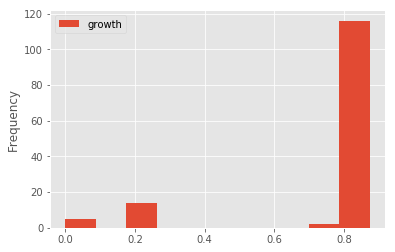

In [17]:
df.plot.hist()

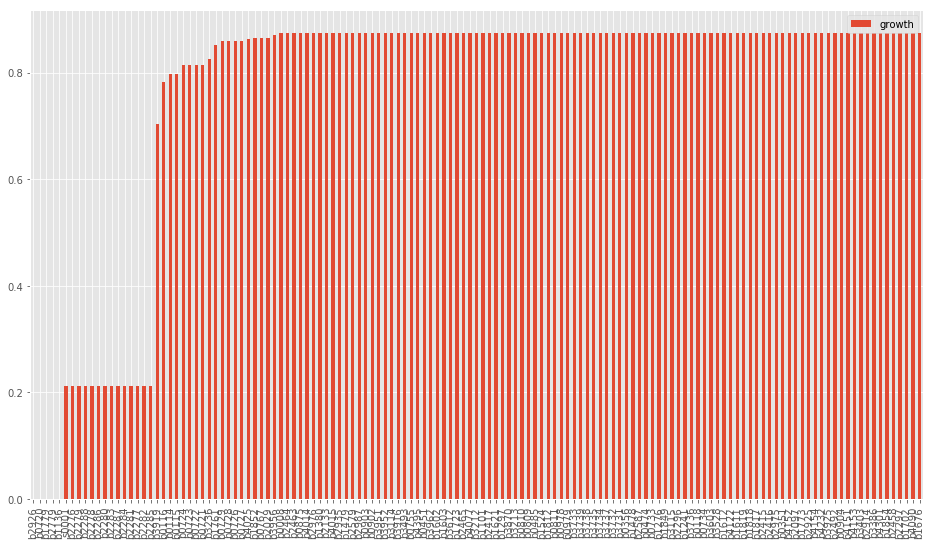

In [18]:
ax = df.plot.bar().axes
ax.figure.set_size_inches(16, 9)